In [1]:
import pandas as pd
import numpy as np

### Ingesting and exploring data

In [21]:
from sklearn import datasets
irisarray = datasets.load_iris()

In [22]:
print(irisarray.keys())
print(irisarray['data'][:5])
print(irisarray['target'][:5])
print(irisarray['target_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


In [23]:
irisdata = pd.DataFrame(
    np.c_[irisarray['data'], irisarray['target']],
    columns = irisarray['feature_names'] + ['Species']
)

irisdata['Species'] = irisdata['Species'].astype(int)
print(irisdata.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


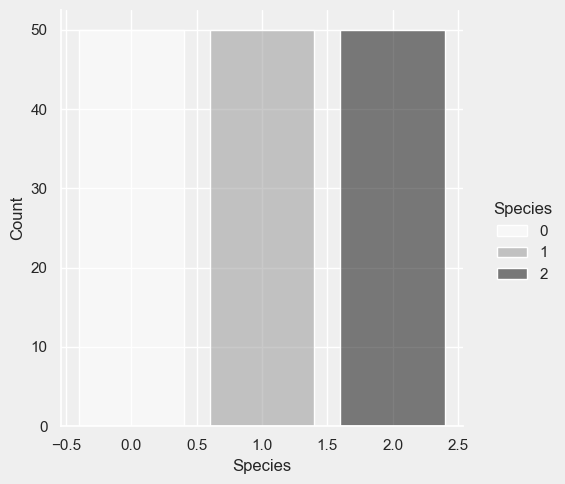

In [24]:
# Check number of observations
import seaborn as sns
sns.displot(
    irisdata, x="Species", discrete = True,
    hue="Species", shrink =0.8, palette="Greys"
)

<Axes: xlabel='Species', ylabel='petal width (cm)'>

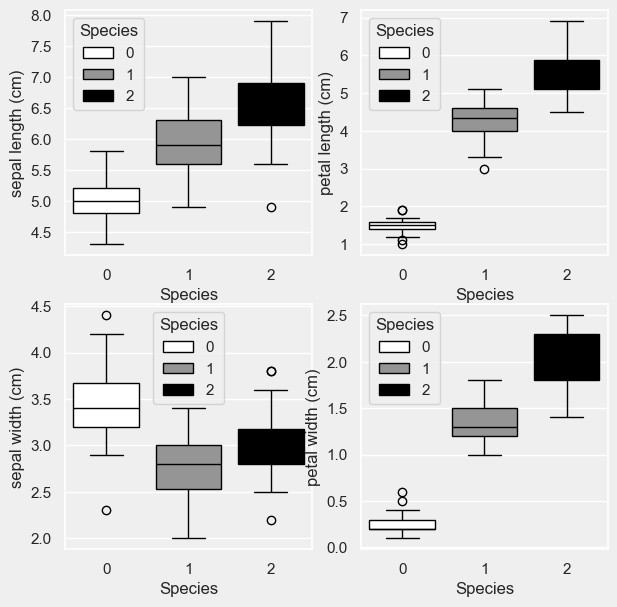

In [25]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2,2, figsize=(7,7))
sns.boxplot(ax=axes[0,0], data = irisdata,
            x="Species", y="sepal length (cm)",
            palette="Greys", hue="Species")
sns.boxplot(ax=axes[0,1], data = irisdata,
            x="Species", y="petal length (cm)",
            palette="Greys", hue="Species")
sns.boxplot(ax=axes[1,0], data = irisdata,
            x="Species", y="sepal width (cm)",
            palette="Greys", hue="Species")
sns.boxplot(ax=axes[1,1], data = irisdata,
            x="Species", y="petal width (cm)",
            palette="Greys", hue="Species")

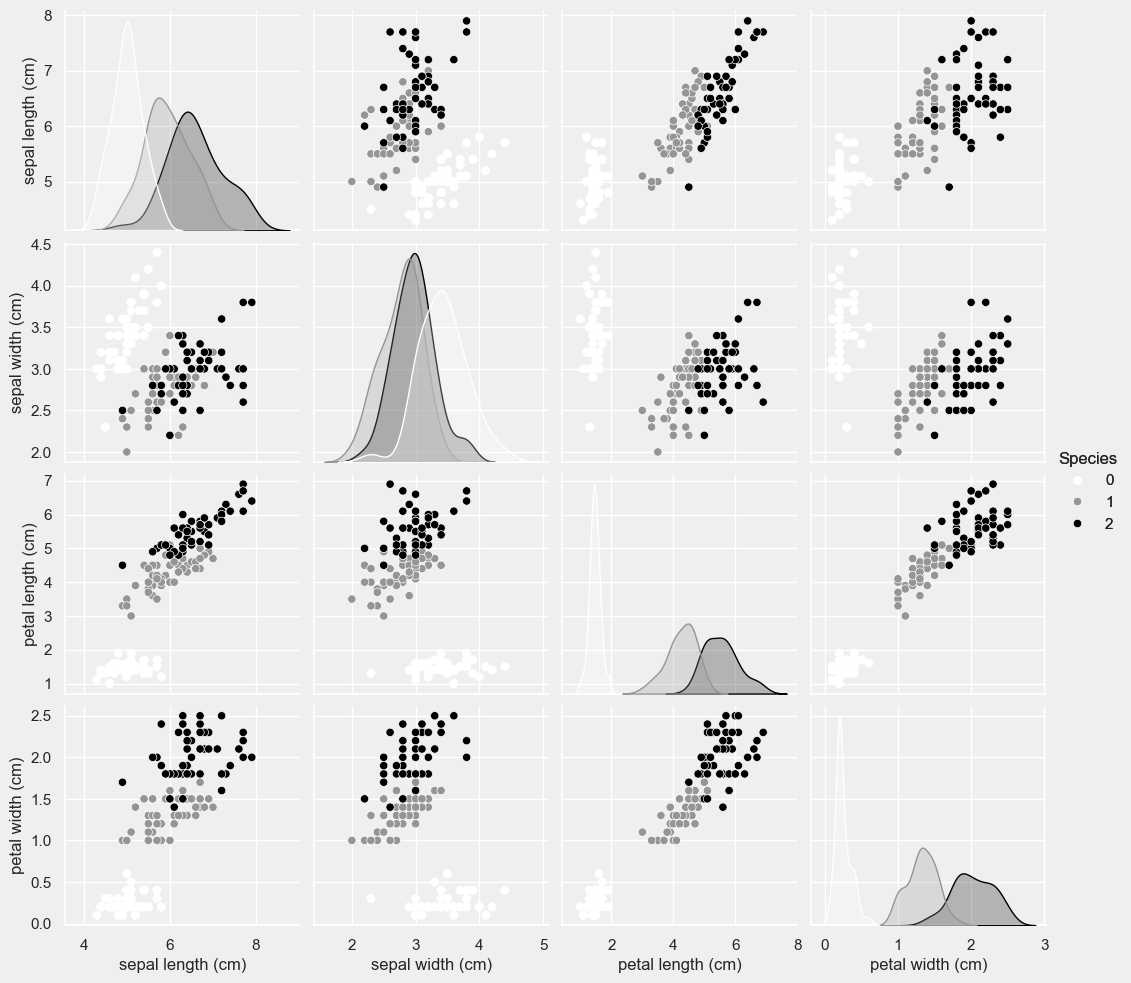

In [26]:
sns.set_theme(
    rc={"axes.facecolor":"efefef",
    "figure.facecolor":"efefef"}
)
graphxy = sns.pairplot(irisdata,
    hue="Species",
    palette="Greys")
graphxy.add_legend()

### Preparing data for modeling

In [10]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(
    irisdata, test_size=0.2, random_state=17
)

In [11]:
training_data.shape, testing_data.shape

((120, 5), (30, 5))

### Setting up and training XGBoost

In [12]:
X_train= training_data [[
    'sepal length (cm)','sepal width (cm)',
    'petal length (cm)','petal width (cm)'
]]
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
29,4.7,3.2,1.6,0.2
98,5.1,2.5,3.0,1.1
37,4.9,3.6,1.4,0.1
5,5.4,3.9,1.7,0.4
81,5.5,2.4,3.7,1.0


In [13]:
y_train = training_data[['Species']]
y_train.head()

,Species
29,0
98,1
37,0
5,0
81,1


In [14]:
X_test= testing_data [[
    'sepal length (cm)','sepal width (cm)',
    'petal length (cm)','petal width (cm)'
]]
y_test= testing_data [['Species']]

In [27]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
iris_classifier = xgb.XGBClassifier(eval_metric="auc")
iris_classifier.fit(
    X_train,y_train,
    eval_set=[(X_test,y_test),(X_train,y_train)]
)

[0]	validation_0-auc:1.00000	validation_1-auc:0.99898
[1]	validation_0-auc:1.00000	validation_1-auc:0.99836
[2]	validation_0-auc:1.00000	validation_1-auc:0.99877
[3]	validation_0-auc:1.00000	validation_1-auc:0.99887
[4]	validation_0-auc:1.00000	validation_1-auc:0.99939
[5]	validation_0-auc:1.00000	validation_1-auc:0.99949
[6]	validation_0-auc:1.00000	validation_1-auc:0.99959
[7]	validation_0-auc:1.00000	validation_1-auc:0.99980
[8]	validation_0-auc:1.00000	validation_1-auc:0.99980
[9]	validation_0-auc:1.00000	validation_1-auc:1.00000
[10]	validation_0-auc:1.00000	validation_1-auc:1.00000
[11]	validation_0-auc:1.00000	validation_1-auc:1.00000
[12]	validation_0-auc:1.00000	validation_1-auc:1.00000
[13]	validation_0-auc:1.00000	validation_1-auc:1.00000
[14]	validation_0-auc:1.00000	validation_1-auc:1.00000
[15]	validation_0-auc:1.00000	validation_1-auc:1.00000
[16]	validation_0-auc:1.00000	validation_1-auc:1.00000
[17]	validation_0-auc:1.00000	validation_1-auc:1.00000
[18]	validation_0-au

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


### Using XGBoost to make a prediction

In [28]:
y_score = iris_classifier.predict(X_test)

In [29]:
print(classification_report(y_test,y_score))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [30]:
conf = confusion_matrix (y_test, y_score)
print ('Confusion matrix \n', conf)

Confusion matrix 
 [[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]


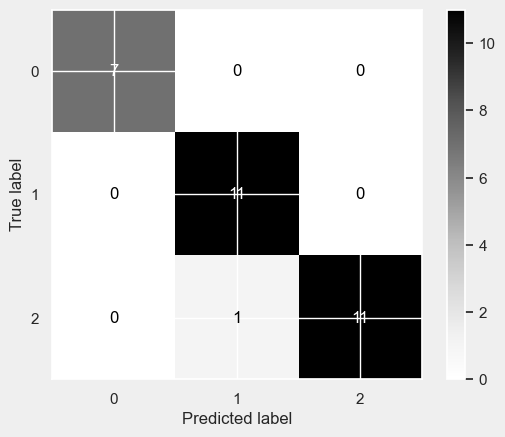

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_score, cmap = "Greys"
)